# Data Loading

In [1]:
# Importing required libraries
import pandas as pd
import os

# Define the directories for plantvillage and plantdoc
base_dir = r'C:\Users\bheja\OneDrive\Desktop\Dataset'
plant_vil_dir = os.path.join(base_dir, 'plantvillage')
plant_doc_dir = os.path.join(base_dir, 'plantdoc')

# Load the CSV files
train_csv_path = os.path.join(base_dir, 'PV_train.csv')
test_seen_csv_path = os.path.join(base_dir, 'PV_test_seen.csv')
test_unseen_csv_path = os.path.join(base_dir, 'PV_test_unseen.csv')
doc_unseen_csv_path = os.path.join(base_dir, 'PD_test_unseen.csv')

# Read the CSV files into pandas DataFrames
train_data = pd.read_csv(train_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_seen_data = pd.read_csv(test_seen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_unseen_data = pd.read_csv(test_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
doc_unseen_data = pd.read_csv(doc_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])

In [2]:
# Print the data types of the columns in the DataFrame
print("Data types of columns in train_data:")
print(train_data.dtypes)

# Print the data types for the specific columns (crop_class and disease_class)
print("\nData type of 'crop_class' column:", train_data["crop_class"].dtype)
print("Data type of 'disease_class' column:", train_data["disease_class"].dtype)

Data types of columns in train_data:
image_name       object
crop_class        int64
disease_class     int64
dtype: object

Data type of 'crop_class' column: int64
Data type of 'disease_class' column: int64


# Generators

## Crop

In [4]:
train_data["crop_class"] = train_data["crop_class"].astype(str)
test_seen_data["crop_class"] = test_seen_data["crop_class"].astype(str)
test_unseen_data["crop_class"] = test_unseen_data["crop_class"].astype(str)
doc_unseen_data["crop_class"] = doc_unseen_data["crop_class"].astype(str)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator for training
train_datagen_crop = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generator for testing --without augmentation, only rescale--
test_datagen_crop = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator_crop = train_datagen_crop.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Use the class indices from the training generator
classes_list = list(train_generator_crop.class_indices.keys())

# Use the same classes_list to ensure consistency in the testing generators
test_seen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

test_unseen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

doc_unseen_generator_crop = test_datagen_crop.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,
    x_col="image_name",
    y_col="crop_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list,  # Using the same classes as training generator
    shuffle=False
)

# Verify the class indices for the data generators again -- :) I guess good practice
print("Class indices for training generator (Crop):", train_generator_crop.class_indices)
print("Class indices for testing generator (Seen Crop):", test_seen_generator_crop.class_indices)
print("Class indices for testing generator (Unseen Crop):", test_unseen_generator_crop.class_indices)
print("Class indices for testing generator (Doc Unseen Crop):", doc_unseen_generator_crop.class_indices)


Found 38994 validated image filenames belonging to 14 classes.
Found 10279 validated image filenames belonging to 14 classes.
Found 216 validated image filenames belonging to 14 classes.
Found 71 validated image filenames belonging to 14 classes.
Class indices for training generator (Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Seen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Unseen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
Class indices for testing generator (Doc Unseen Crop): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}


## Disease

In [7]:
train_data["disease_class"] = train_data["disease_class"].astype(str)
test_seen_data["disease_class"] = test_seen_data["disease_class"].astype(str)
test_unseen_data["disease_class"] = test_unseen_data["disease_class"].astype(str)
doc_unseen_data["disease_class"] = doc_unseen_data["disease_class"].astype(str)



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator for training
train_datagen_disease = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generator for testing --without augmentation, only rescale--
test_datagen_disease = ImageDataGenerator(rescale=1./255)

# Create the training data generator for disease classes
train_generator_disease = train_datagen_disease.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Use the class indices from the training generator
classes_list_disease = list(train_generator_disease.class_indices.keys())

# Use the same classes_list_disease to ensure consistency in the testing generators
test_seen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

test_unseen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

doc_unseen_generator_disease = test_datagen_disease.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,
    x_col="image_name",
    y_col="disease_class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_list_disease,  # Using the same classes as training generator
    shuffle=False
)

# Verify the class indices for the data generators again
print("Class indices for training generator (Disease):", train_generator_disease.class_indices)
print("Class indices for testing generator (Seen Disease):", test_seen_generator_disease.class_indices)
print("Class indices for testing generator (Unseen Disease):", test_unseen_generator_disease.class_indices)
print("Class indices for testing generator (Doc Unseen Disease):", doc_unseen_generator_disease.class_indices)




Found 38994 validated image filenames belonging to 21 classes.
Found 10279 validated image filenames belonging to 21 classes.
Found 216 validated image filenames belonging to 21 classes.
Found 71 validated image filenames belonging to 21 classes.
Class indices for training generator (Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing generator (Seen Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing generator (Unseen Disease): {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20}
Class indices for testing 

# Resnet

## Crop Testing

In [27]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, AUC

# Load the saved ResNet50v2 crop model
model = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\resnet50v2_crop.h5', custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Evaluate the model on PV seen test data
print("Evaluating on PV Seen Test Data:")
pv_seen_loss, pv_seen_accuracy, pv_seen_precision, pv_seen_recall, pv_seen_auc = model.evaluate(test_seen_generator_crop)
print(f"PV Seen Test Data Accuracy: {pv_seen_accuracy:.4f}")

# Evaluate the model on PV unseen test data
print("\nEvaluating on PV Unseen Test Data:")
pv_unseen_loss, pv_unseen_accuracy, pv_unseen_precision, pv_unseen_recall, pv_unseen_auc = model.evaluate(test_unseen_generator_crop)
print(f"PV Unseen Test Data Accuracy: {pv_unseen_accuracy:.4f}")

# Evaluate the model on PD unseen test data
print("\nEvaluating on PD Unseen Test Data:")
pd_unseen_loss, pd_unseen_accuracy, pd_unseen_precision, pd_unseen_recall, pd_unseen_auc = model.evaluate(doc_unseen_generator_crop)
print(f"PD Unseen Test Data Accuracy: {pd_unseen_accuracy:.4f}")

# Generate predictions on PV seen test data for top-1 and top-5 accuracy
pv_seen_predictions = model.predict(test_seen_generator_crop)
pv_seen_pred_classes = np.argmax(pv_seen_predictions, axis=1)

# Top-1 Accuracy for PV Seen Test Data
top_1_predictions_pv_seen = pv_seen_pred_classes
top_1_accuracy_pv_seen = accuracy_score(test_seen_generator_crop.classes, top_1_predictions_pv_seen)
print(f"\nTop-1 Accuracy on PV Seen Test Data: {top_1_accuracy_pv_seen:.4f}")

# Top-5 Accuracy for PV Seen Test Data
top_5_predictions_pv_seen = np.argsort(pv_seen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_seen = np.mean([test_seen_generator_crop.classes[i] in top_5_predictions_pv_seen[i] for i in range(len(test_seen_generator_crop.classes))])
print(f"Top-5 Accuracy on PV Seen Test Data: {top_5_accuracy_pv_seen:.4f}")

# Confusion Matrix for PV Seen Test Data
conf_matrix = confusion_matrix(test_seen_generator_crop.classes, pv_seen_pred_classes)
print("\nConfusion Matrix for PV Seen Test Data:")
print(conf_matrix)

# Harmonic Mean between PV Seen and PV Unseen Accuracies
if pv_seen_accuracy + pv_unseen_accuracy > 0:
    harmonic_mean_accuracy = 2 * (pv_seen_accuracy * pv_unseen_accuracy) / (pv_seen_accuracy + pv_unseen_accuracy)
else:
    harmonic_mean_accuracy = 0
print(f"\nHarmonic Mean Accuracy between PV Seen and PV Unseen: {harmonic_mean_accuracy:.4f}")

# Generate predictions on PV unseen test data for top-1 and top-5 accuracy
pv_unseen_predictions = model.predict(test_unseen_generator_crop)

# Top-1 Accuracy for PV Unseen Test Data
top_1_predictions_pv_unseen = np.argmax(pv_unseen_predictions, axis=1)
top_1_accuracy_pv_unseen = accuracy_score(test_unseen_generator_crop.classes, top_1_predictions_pv_unseen)
print(f"\nTop-1 Accuracy on PV Unseen Test Data: {top_1_accuracy_pv_unseen:.4f}")

# Top-5 Accuracy for PV Unseen Test Data
top_5_predictions_pv_unseen = np.argsort(pv_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_unseen = np.mean([test_unseen_generator_crop.classes[i] in top_5_predictions_pv_unseen[i] for i in range(len(test_unseen_generator_crop.classes))])
print(f"Top-5 Accuracy on PV Unseen Test Data: {top_5_accuracy_pv_unseen:.4f}")

# Generate predictions on PD unseen test data for top-1 and top-5 accuracy
pd_unseen_predictions = model.predict(doc_unseen_generator_crop)

# Top-1 Accuracy for PD Unseen Test Data
top_1_predictions_pd_unseen = np.argmax(pd_unseen_predictions, axis=1)
top_1_accuracy_pd_unseen = accuracy_score(doc_unseen_generator_crop.classes, top_1_predictions_pd_unseen)
print(f"\nTop-1 Accuracy on PD Unseen Test Data: {top_1_accuracy_pd_unseen:.4f}")

# Top-5 Accuracy for PD Unseen Test Data
top_5_predictions_pd_unseen = np.argsort(pd_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pd_unseen = np.mean([doc_unseen_generator_crop.classes[i] in top_5_predictions_pd_unseen[i] for i in range(len(doc_unseen_generator_crop.classes))])
print(f"Top-5 Accuracy on PD Unseen Test Data: {top_5_accuracy_pd_unseen:.4f}")


Evaluating on PV Seen Test Data:
322/322 [==============================] - 46s 138ms/step - loss: 0.0297 - accuracy: 0.9948 - precision_2: 0.9949 - recall_2: 0.9946 - auc_2: 0.9989
PV Seen Test Data Accuracy: 0.9948

Evaluating on PV Unseen Test Data:
7/7 [==============================] - 1s 96ms/step - loss: 0.8422 - accuracy: 0.8380 - precision_2: 0.8619 - recall_2: 0.8380 - auc_2: 0.9677
PV Unseen Test Data Accuracy: 0.8380

Evaluating on PD Unseen Test Data:
3/3 [==============================] - 1s 299ms/step - loss: 6.6288 - accuracy: 0.4225 - precision_2: 0.4328 - recall_2: 0.4085 - auc_2: 0.7262
PD Unseen Test Data Accuracy: 0.4225
322/322 [==============================] - 33s 99ms/step

Top-1 Accuracy on PV Seen Test Data: 0.9948
Top-5 Accuracy on PV Seen Test Data: 0.9995

Confusion Matrix for PV Seen Test Data:
[[ 632    0    0    0    0    0    0    0    0    0    1    0    0    0]
 [   0  270    0    0    0    0    0    0    0    0    0    0    1    0]
 [   2    0  881 

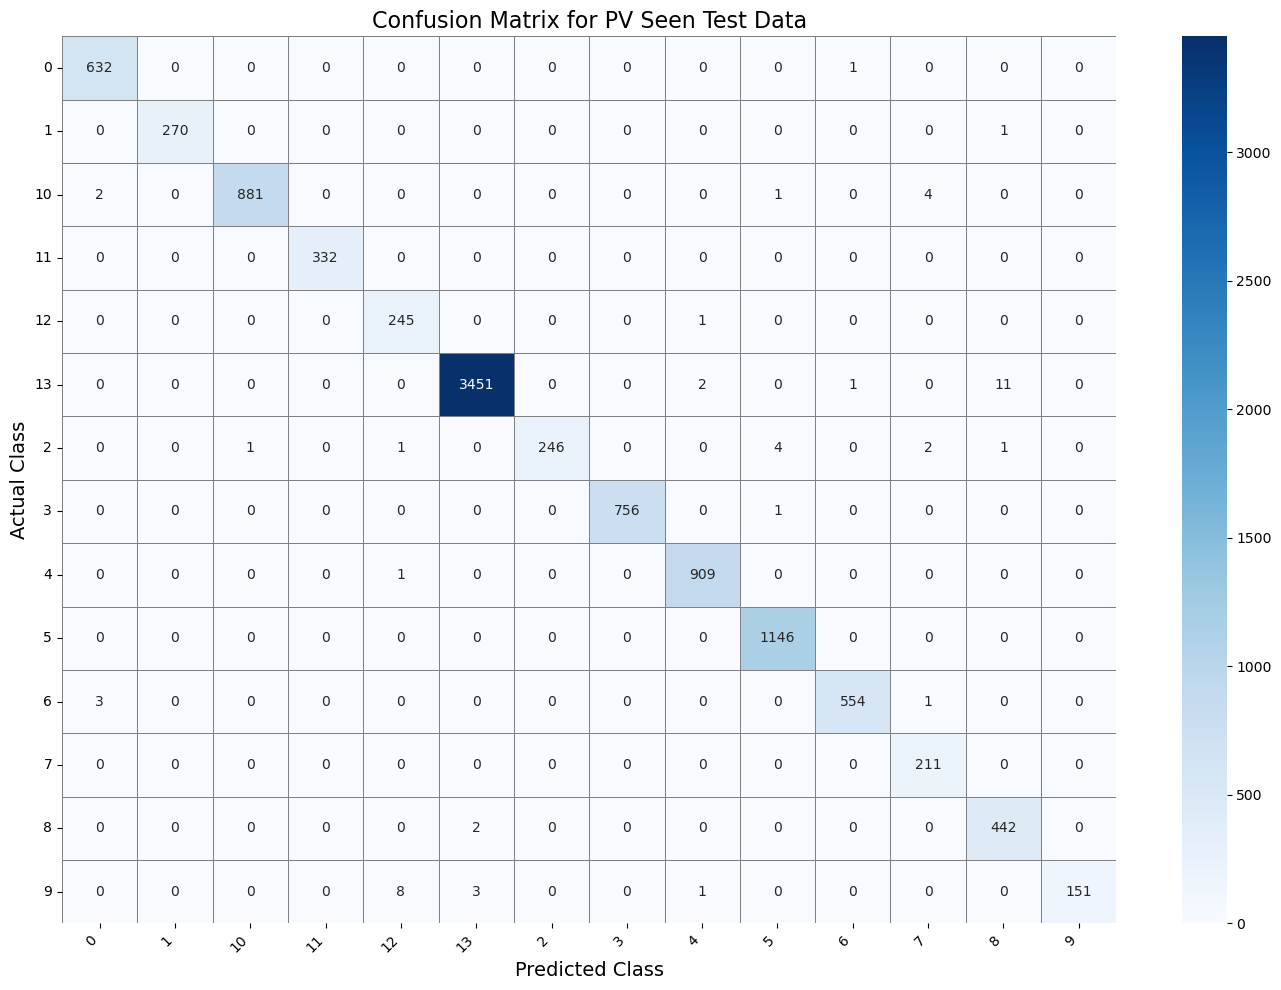

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming conf_matrix is already generated
# and test_seen_generator_crop.class_indices provides class names
class_names = list(test_seen_generator_crop.class_indices.keys())

# Plotting the confusion matrix
plt.figure(figsize=(14, 10))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, 
            linewidths=0.5, linecolor='grey')

# Setting labels and title
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix for PV Seen Test Data', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Disease Testing

Evaluating on PV Seen Test Data:
322/322 [==============================] - 34s 99ms/step - loss: 0.0611 - accuracy: 0.9857 - precision_10: 0.9863 - recall_10: 0.9851 - auc_10: 0.9983
PV Seen Test Data Accuracy: 0.9857

Evaluating on PV Unseen Test Data:
7/7 [==============================] - 1s 96ms/step - loss: 7.7004 - accuracy: 0.1250 - precision_10: 0.1050 - recall_10: 0.0972 - auc_10: 0.6580
PV Unseen Test Data Accuracy: 0.1250

Evaluating on PD Unseen Test Data:
3/3 [==============================] - 1s 267ms/step - loss: 10.5364 - accuracy: 0.0563 - precision_10: 0.0678 - recall_10: 0.0563 - auc_10: 0.5432
PD Unseen Test Data Accuracy: 0.0563
322/322 [==============================] - 32s 95ms/step

Top-1 Accuracy on PV Seen Test Data: 0.9857
Top-5 Accuracy on PV Seen Test Data: 0.9992


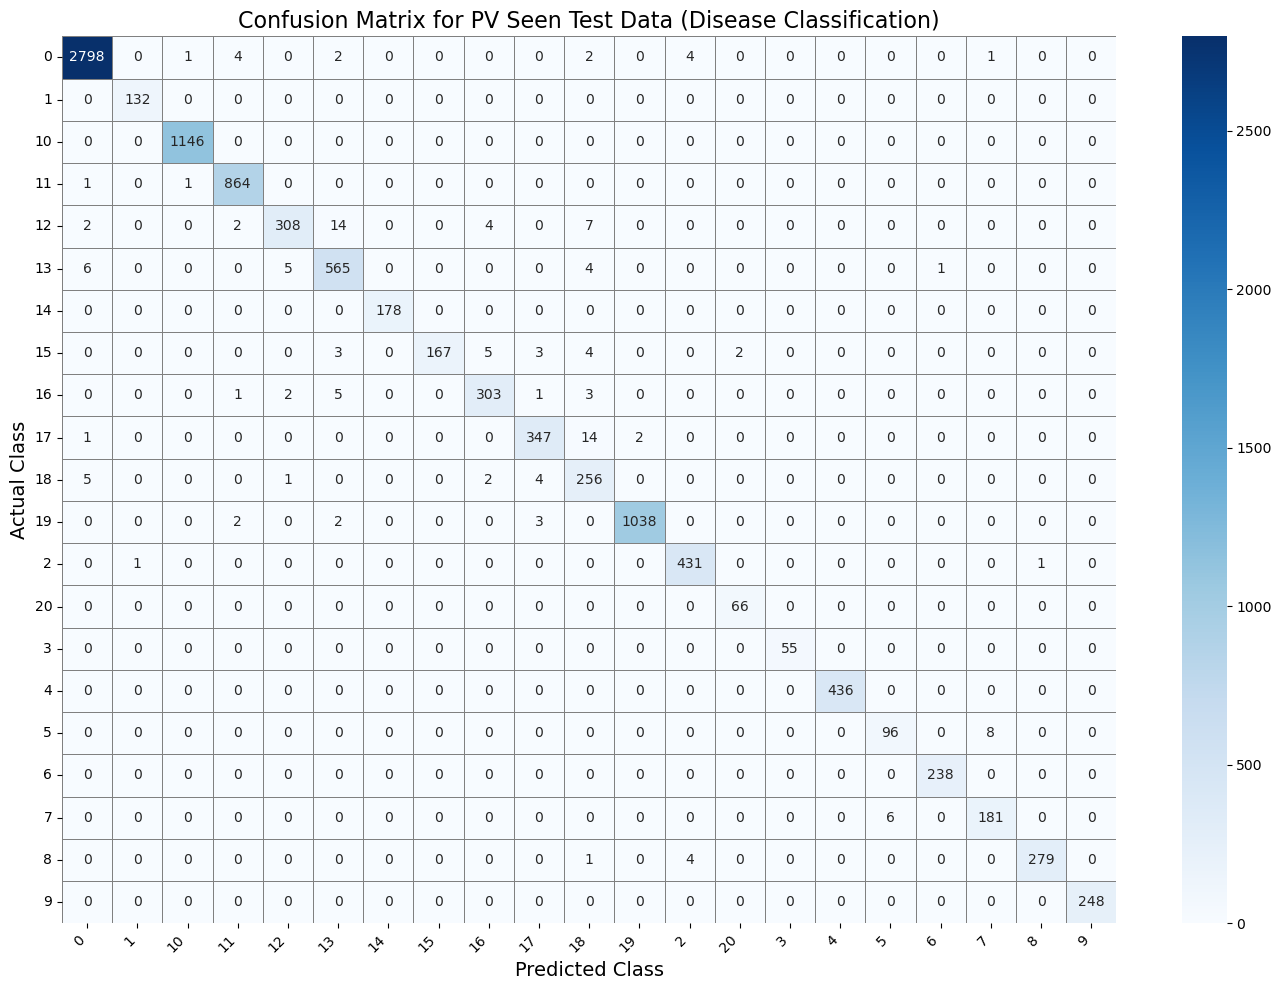


Harmonic Mean Accuracy between PV Seen and PV Unseen: 0.2219
7/7 [==============================] - 1s 125ms/step

Top-1 Accuracy on PV Unseen Test Data: 0.1250
Top-5 Accuracy on PV Unseen Test Data: 0.8148
3/3 [==============================] - 1s 317ms/step

Top-1 Accuracy on PD Unseen Test Data: 0.0563
Top-5 Accuracy on PD Unseen Test Data: 0.3099


In [30]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved ResNet50v2 disease model
model_r_d = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\resnet50v2_disease.h5', custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Evaluate the model on PV seen test data
print("Evaluating on PV Seen Test Data:")
pv_seen_loss, pv_seen_accuracy, pv_seen_precision, pv_seen_recall, pv_seen_auc = model_r_d.evaluate(test_seen_generator_disease)
print(f"PV Seen Test Data Accuracy: {pv_seen_accuracy:.4f}")

# Evaluate the model on PV unseen test data
print("\nEvaluating on PV Unseen Test Data:")
pv_unseen_loss, pv_unseen_accuracy, pv_unseen_precision, pv_unseen_recall, pv_unseen_auc = model_r_d.evaluate(test_unseen_generator_disease)
print(f"PV Unseen Test Data Accuracy: {pv_unseen_accuracy:.4f}")

# Evaluate the model on PD unseen test data
print("\nEvaluating on PD Unseen Test Data:")
pd_unseen_loss, pd_unseen_accuracy, pd_unseen_precision, pd_unseen_recall, pd_unseen_auc = model_r_d.evaluate(doc_unseen_generator_disease)
print(f"PD Unseen Test Data Accuracy: {pd_unseen_accuracy:.4f}")

# Generate predictions on PV seen test data for top-1 and top-5 accuracy
pv_seen_predictions = model_r_d.predict(test_seen_generator_disease)
pv_seen_pred_classes = np.argmax(pv_seen_predictions, axis=1)

# Top-1 Accuracy for PV Seen Test Data
top_1_predictions_pv_seen = pv_seen_pred_classes
top_1_accuracy_pv_seen = accuracy_score(test_seen_generator_disease.classes, top_1_predictions_pv_seen)
print(f"\nTop-1 Accuracy on PV Seen Test Data: {top_1_accuracy_pv_seen:.4f}")

# Top-5 Accuracy for PV Seen Test Data
top_5_predictions_pv_seen = np.argsort(pv_seen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_seen = np.mean([test_seen_generator_disease.classes[i] in top_5_predictions_pv_seen[i] for i in range(len(test_seen_generator_disease.classes))])
print(f"Top-5 Accuracy on PV Seen Test Data: {top_5_accuracy_pv_seen:.4f}")

# Confusion Matrix for PV Seen Test Data
conf_matrix = confusion_matrix(test_seen_generator_disease.classes, pv_seen_pred_classes)

# Plotting the Confusion Matrix for Disease Classification
plt.figure(figsize=(14, 10))
class_names = list(test_seen_generator_disease.class_indices.keys())

# Use Seaborn to create a visually appealing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='grey')

# Setting labels, title, and axis properties
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix for PV Seen Test Data (Disease Classification)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout for a cleaner look
plt.tight_layout()

# Display the plot
plt.show()

# Harmonic Mean between PV Seen and PV Unseen Accuracies
if pv_seen_accuracy + pv_unseen_accuracy > 0:
    harmonic_mean_accuracy = 2 * (pv_seen_accuracy * pv_unseen_accuracy) / (pv_seen_accuracy + pv_unseen_accuracy)
else:
    harmonic_mean_accuracy = 0
print(f"\nHarmonic Mean Accuracy between PV Seen and PV Unseen: {harmonic_mean_accuracy:.4f}")

# Generate predictions on PV unseen test data for top-1 and top-5 accuracy
pv_unseen_predictions = model_r_d.predict(test_unseen_generator_disease)

# Top-1 Accuracy for PV Unseen Test Data
top_1_predictions_pv_unseen = np.argmax(pv_unseen_predictions, axis=1)
top_1_accuracy_pv_unseen = accuracy_score(test_unseen_generator_disease.classes, top_1_predictions_pv_unseen)
print(f"\nTop-1 Accuracy on PV Unseen Test Data: {top_1_accuracy_pv_unseen:.4f}")

# Top-5 Accuracy for PV Unseen Test Data
top_5_predictions_pv_unseen = np.argsort(pv_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_unseen = np.mean([test_unseen_generator_disease.classes[i] in top_5_predictions_pv_unseen[i] for i in range(len(test_unseen_generator_disease.classes))])
print(f"Top-5 Accuracy on PV Unseen Test Data: {top_5_accuracy_pv_unseen:.4f}")

# Generate predictions on PD unseen test data for top-1 and top-5 accuracy
pd_unseen_predictions = model_r_d.predict(doc_unseen_generator_disease)

# Top-1 Accuracy for PD Unseen Test Data
top_1_predictions_pd_unseen = np.argmax(pd_unseen_predictions, axis=1)
top_1_accuracy_pd_unseen = accuracy_score(doc_unseen_generator_disease.classes, top_1_predictions_pd_unseen)
print(f"\nTop-1 Accuracy on PD Unseen Test Data: {top_1_accuracy_pd_unseen:.4f}")

# Top-5 Accuracy for PD Unseen Test Data
top_5_predictions_pd_unseen = np.argsort(pd_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pd_unseen = np.mean([doc_unseen_generator_disease.classes[i] in top_5_predictions_pd_unseen[i] for i in range(len(doc_unseen_generator_disease.classes))])
print(f"Top-5 Accuracy on PD Unseen Test Data: {top_5_accuracy_pd_unseen:.4f}")


# DenseNet

## Crop

Evaluating on PV Seen Test Data:
322/322 [==============================] - 48s 139ms/step - loss: 0.0155 - accuracy: 0.9976 - precision_5: 0.9976 - recall_5: 0.9973 - auc_5: 0.9996
PV Seen Test Data Accuracy: 0.9976

Evaluating on PV Unseen Test Data:
7/7 [==============================] - 1s 145ms/step - loss: 1.2906 - accuracy: 0.7593 - precision_5: 0.7642 - recall_5: 0.7500 - auc_5: 0.9464
PV Unseen Test Data Accuracy: 0.7593

Evaluating on PD Unseen Test Data:
3/3 [==============================] - 1s 281ms/step - loss: 5.4789 - accuracy: 0.3662 - precision_5: 0.3387 - recall_5: 0.2958 - auc_5: 0.7439
PD Unseen Test Data Accuracy: 0.3662
322/322 [==============================] - 45s 133ms/step

Top-1 Accuracy on PV Seen Test Data: 0.9976
Top-5 Accuracy on PV Seen Test Data: 0.9998


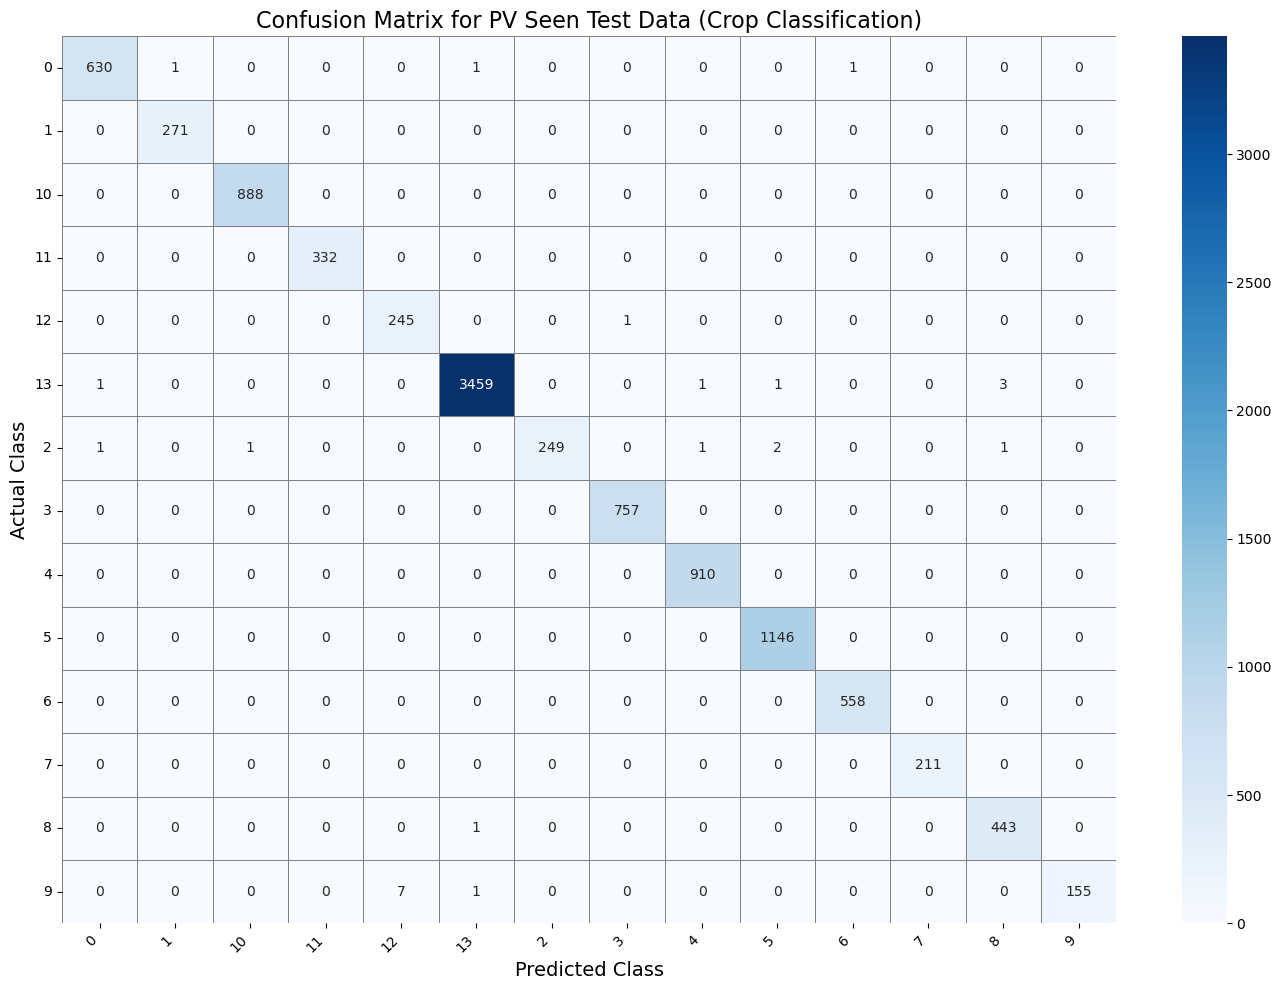


Harmonic Mean Accuracy between PV Seen and PV Unseen: 0.8623
7/7 [==============================] - 1s 133ms/step

Top-1 Accuracy on PV Unseen Test Data: 0.7593
Top-5 Accuracy on PV Unseen Test Data: 1.0000
3/3 [==============================] - 1s 304ms/step

Top-1 Accuracy on PD Unseen Test Data: 0.3662
Top-5 Accuracy on PD Unseen Test Data: 0.9155


In [17]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved DenseNet crop model
model = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\densenet121_crop.h5', custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Evaluate the model on PV seen test data
print("Evaluating on PV Seen Test Data:")
pv_seen_loss, pv_seen_accuracy, pv_seen_precision, pv_seen_recall, pv_seen_auc = model.evaluate(test_seen_generator_crop)
print(f"PV Seen Test Data Accuracy: {pv_seen_accuracy:.4f}")

# Evaluate the model on PV unseen test data
print("\nEvaluating on PV Unseen Test Data:")
pv_unseen_loss, pv_unseen_accuracy, pv_unseen_precision, pv_unseen_recall, pv_unseen_auc = model.evaluate(test_unseen_generator_crop)
print(f"PV Unseen Test Data Accuracy: {pv_unseen_accuracy:.4f}")

# Evaluate the model on PD unseen test data
print("\nEvaluating on PD Unseen Test Data:")
pd_unseen_loss, pd_unseen_accuracy, pd_unseen_precision, pd_unseen_recall, pd_unseen_auc = model.evaluate(doc_unseen_generator_crop)
print(f"PD Unseen Test Data Accuracy: {pd_unseen_accuracy:.4f}")

# Generate predictions on PV seen test data for top-1 and top-5 accuracy
pv_seen_predictions = model.predict(test_seen_generator_crop)
pv_seen_pred_classes = np.argmax(pv_seen_predictions, axis=1)

# Top-1 Accuracy for PV Seen Test Data
top_1_predictions_pv_seen = pv_seen_pred_classes
top_1_accuracy_pv_seen = accuracy_score(test_seen_generator_crop.classes, top_1_predictions_pv_seen)
print(f"\nTop-1 Accuracy on PV Seen Test Data: {top_1_accuracy_pv_seen:.4f}")

# Top-5 Accuracy for PV Seen Test Data
top_5_predictions_pv_seen = np.argsort(pv_seen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_seen = np.mean([test_seen_generator_crop.classes[i] in top_5_predictions_pv_seen[i] for i in range(len(test_seen_generator_crop.classes))])
print(f"Top-5 Accuracy on PV Seen Test Data: {top_5_accuracy_pv_seen:.4f}")

# Confusion Matrix for PV Seen Test Data
conf_matrix = confusion_matrix(test_seen_generator_crop.classes, pv_seen_pred_classes)

# Plotting the Confusion Matrix for Crop Classification
plt.figure(figsize=(14, 10))
class_names = list(test_seen_generator_crop.class_indices.keys())

# Use Seaborn to create a visually appealing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='grey')

# Setting labels, title, and axis properties
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix for PV Seen Test Data (Crop Classification)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout for a cleaner look
plt.tight_layout()

# Display the plot
plt.show()

# Harmonic Mean between PV Seen and PV Unseen Accuracies
if pv_seen_accuracy + pv_unseen_accuracy > 0:
    harmonic_mean_accuracy = 2 * (pv_seen_accuracy * pv_unseen_accuracy) / (pv_seen_accuracy + pv_unseen_accuracy)
else:
    harmonic_mean_accuracy = 0
print(f"\nHarmonic Mean Accuracy between PV Seen and PV Unseen: {harmonic_mean_accuracy:.4f}")

# Generate predictions on PV unseen test data for top-1 and top-5 accuracy
pv_unseen_predictions = model.predict(test_unseen_generator_crop)

# Top-1 Accuracy for PV Unseen Test Data
top_1_predictions_pv_unseen = np.argmax(pv_unseen_predictions, axis=1)
top_1_accuracy_pv_unseen = accuracy_score(test_unseen_generator_crop.classes, top_1_predictions_pv_unseen)
print(f"\nTop-1 Accuracy on PV Unseen Test Data: {top_1_accuracy_pv_unseen:.4f}")

# Top-5 Accuracy for PV Unseen Test Data
top_5_predictions_pv_unseen = np.argsort(pv_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_unseen = np.mean([test_unseen_generator_crop.classes[i] in top_5_predictions_pv_unseen[i] for i in range(len(test_unseen_generator_crop.classes))])
print(f"Top-5 Accuracy on PV Unseen Test Data: {top_5_accuracy_pv_unseen:.4f}")

# Generate predictions on PD unseen test data for top-1 and top-5 accuracy
pd_unseen_predictions = model.predict(doc_unseen_generator_crop)

# Top-1 Accuracy for PD Unseen Test Data
top_1_predictions_pd_unseen = np.argmax(pd_unseen_predictions, axis=1)
top_1_accuracy_pd_unseen = accuracy_score(doc_unseen_generator_crop.classes, top_1_predictions_pd_unseen)
print(f"\nTop-1 Accuracy on PD Unseen Test Data: {top_1_accuracy_pd_unseen:.4f}")

# Top-5 Accuracy for PD Unseen Test Data
top_5_predictions_pd_unseen = np.argsort(pd_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pd_unseen = np.mean([doc_unseen_generator_crop.classes[i] in top_5_predictions_pd_unseen[i] for i in range(len(doc_unseen_generator_crop.classes))])
print(f"Top-5 Accuracy on PD Unseen Test Data: {top_5_accuracy_pd_unseen:.4f}")


## Disease

Evaluating on PV Seen Test Data:
322/322 [==============================] - 47s 137ms/step - loss: 0.0345 - accuracy: 0.9919 - precision_11: 0.9925 - recall_11: 0.9917 - auc_11: 0.9991
PV Seen Test Data Accuracy: 0.9919

Evaluating on PV Unseen Test Data:
7/7 [==============================] - 1s 134ms/step - loss: 6.0869 - accuracy: 0.1667 - precision_11: 0.1397 - recall_11: 0.1157 - auc_11: 0.6748
PV Unseen Test Data Accuracy: 0.1667

Evaluating on PD Unseen Test Data:
3/3 [==============================] - 1s 283ms/step - loss: 11.9464 - accuracy: 0.0423 - precision_11: 0.0159 - recall_11: 0.0141 - auc_11: 0.4875     
PD Unseen Test Data Accuracy: 0.0423
322/322 [==============================] - 45s 134ms/step

Top-1 Accuracy on PV Seen Test Data: 0.9919
Top-5 Accuracy on PV Seen Test Data: 0.9998


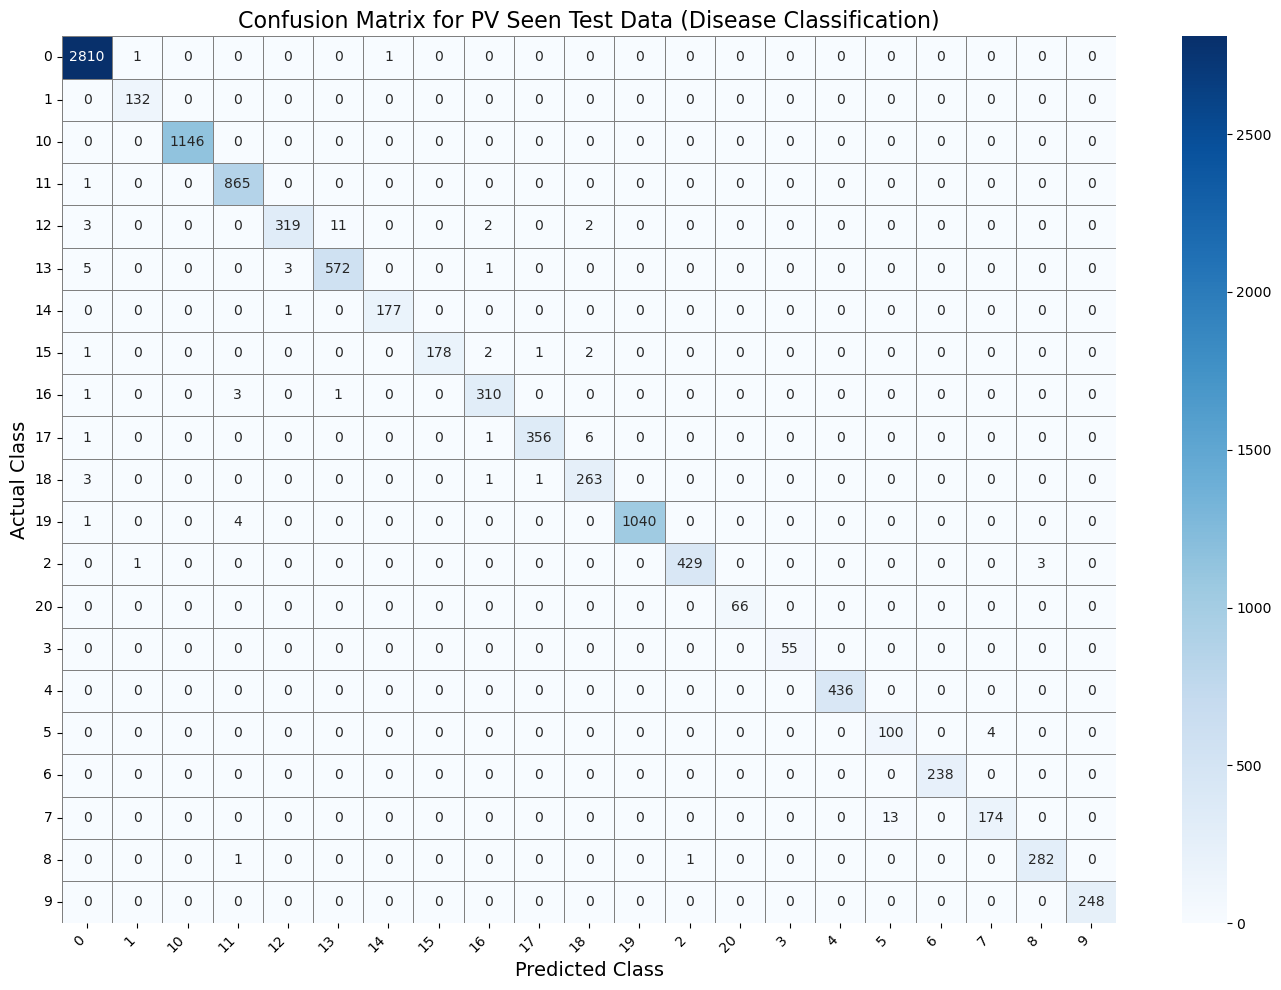


Harmonic Mean Accuracy between PV Seen and PV Unseen: 0.2854
7/7 [==============================] - 1s 171ms/step

Top-1 Accuracy on PV Unseen Test Data: 0.1667
Top-5 Accuracy on PV Unseen Test Data: 0.6667
3/3 [==============================] - 1s 343ms/step

Top-1 Accuracy on PD Unseen Test Data: 0.0423
Top-5 Accuracy on PD Unseen Test Data: 0.1408


In [18]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved DenseNet disease model
model = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\densenet121_disease.h5', custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Evaluate the model on PV seen test data
print("Evaluating on PV Seen Test Data:")
pv_seen_loss, pv_seen_accuracy, pv_seen_precision, pv_seen_recall, pv_seen_auc = model.evaluate(test_seen_generator_disease)
print(f"PV Seen Test Data Accuracy: {pv_seen_accuracy:.4f}")

# Evaluate the model on PV unseen test data
print("\nEvaluating on PV Unseen Test Data:")
pv_unseen_loss, pv_unseen_accuracy, pv_unseen_precision, pv_unseen_recall, pv_unseen_auc = model.evaluate(test_unseen_generator_disease)
print(f"PV Unseen Test Data Accuracy: {pv_unseen_accuracy:.4f}")

# Evaluate the model on PD unseen test data
print("\nEvaluating on PD Unseen Test Data:")
pd_unseen_loss, pd_unseen_accuracy, pd_unseen_precision, pd_unseen_recall, pd_unseen_auc = model.evaluate(doc_unseen_generator_disease)
print(f"PD Unseen Test Data Accuracy: {pd_unseen_accuracy:.4f}")

# Generate predictions on PV seen test data for top-1 and top-5 accuracy
pv_seen_predictions = model.predict(test_seen_generator_disease)
pv_seen_pred_classes = np.argmax(pv_seen_predictions, axis=1)

# Top-1 Accuracy for PV Seen Test Data
top_1_predictions_pv_seen = pv_seen_pred_classes
top_1_accuracy_pv_seen = accuracy_score(test_seen_generator_disease.classes, top_1_predictions_pv_seen)
print(f"\nTop-1 Accuracy on PV Seen Test Data: {top_1_accuracy_pv_seen:.4f}")

# Top-5 Accuracy for PV Seen Test Data
top_5_predictions_pv_seen = np.argsort(pv_seen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_seen = np.mean([test_seen_generator_disease.classes[i] in top_5_predictions_pv_seen[i] for i in range(len(test_seen_generator_disease.classes))])
print(f"Top-5 Accuracy on PV Seen Test Data: {top_5_accuracy_pv_seen:.4f}")

# Confusion Matrix for PV Seen Test Data
conf_matrix = confusion_matrix(test_seen_generator_disease.classes, pv_seen_pred_classes)

# Plotting the Confusion Matrix for Disease Classification
plt.figure(figsize=(14, 10))
class_names = list(test_seen_generator_disease.class_indices.keys())

# Use Seaborn to create a visually appealing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='grey')

# Setting labels, title, and axis properties
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix for PV Seen Test Data (Disease Classification)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout for a cleaner look
plt.tight_layout()

# Display the plot
plt.show()

# Harmonic Mean between PV Seen and PV Unseen Accuracies
if pv_seen_accuracy + pv_unseen_accuracy > 0:
    harmonic_mean_accuracy = 2 * (pv_seen_accuracy * pv_unseen_accuracy) / (pv_seen_accuracy + pv_unseen_accuracy)
else:
    harmonic_mean_accuracy = 0
print(f"\nHarmonic Mean Accuracy between PV Seen and PV Unseen: {harmonic_mean_accuracy:.4f}")

# Generate predictions on PV unseen test data for top-1 and top-5 accuracy
pv_unseen_predictions = model.predict(test_unseen_generator_disease)

# Top-1 Accuracy for PV Unseen Test Data
top_1_predictions_pv_unseen = np.argmax(pv_unseen_predictions, axis=1)
top_1_accuracy_pv_unseen = accuracy_score(test_unseen_generator_disease.classes, top_1_predictions_pv_unseen)
print(f"\nTop-1 Accuracy on PV Unseen Test Data: {top_1_accuracy_pv_unseen:.4f}")

# Top-5 Accuracy for PV Unseen Test Data
top_5_predictions_pv_unseen = np.argsort(pv_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pv_unseen = np.mean([test_unseen_generator_disease.classes[i] in top_5_predictions_pv_unseen[i] for i in range(len(test_unseen_generator_disease.classes))])
print(f"Top-5 Accuracy on PV Unseen Test Data: {top_5_accuracy_pv_unseen:.4f}")

# Generate predictions on PD unseen test data for top-1 and top-5 accuracy
pd_unseen_predictions = model.predict(doc_unseen_generator_disease)

# Top-1 Accuracy for PD Unseen Test Data
top_1_predictions_pd_unseen = np.argmax(pd_unseen_predictions, axis=1)
top_1_accuracy_pd_unseen = accuracy_score(doc_unseen_generator_disease.classes, top_1_predictions_pd_unseen)
print(f"\nTop-1 Accuracy on PD Unseen Test Data: {top_1_accuracy_pd_unseen:.4f}")

# Top-5 Accuracy for PD Unseen Test Data
top_5_predictions_pd_unseen = np.argsort(pd_unseen_predictions, axis=1)[:, -5:]
top_5_accuracy_pd_unseen = np.mean([doc_unseen_generator_disease.classes[i] in top_5_predictions_pd_unseen[i] for i in range(len(doc_unseen_generator_disease.classes))])
print(f"Top-5 Accuracy on PD Unseen Test Data: {top_5_accuracy_pd_unseen:.4f}")
